In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import dataset

In [2]:
ds=pd.read_csv('data/houses_1.csv')

In [3]:
ds.head(5)

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,1,10.0,0,NaN,321.0,2.0,0,TO_BE_DONE_UP
1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,0,NaN,0,NaN,570.0,4.0,0,NaN
2,8760,HOUSE,HOUSE,145000.0,6,NaN,0,0,0,0,NaN,1,NaN,233.0,NaN,0,TO_RENOVATE
3,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,1,NaN,1,300.0,470.0,3.0,0,TO_BE_DONE_UP
4,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,0,NaN,1,1300.0,1500.0,4.0,0,NaN


In [4]:
postalcode = pd.read_csv('data/postalcode.csv', encoding='latin1')
postalcode.sort_values(by=['postalCode', 'Sous_Commune'], inplace=True)
 # Keeping only first row (corresponding to the principal municipality when postalCode ends with 0)
# for rows having same postalCode
postalcode.drop_duplicates(['postalCode'], keep='first', inplace=True, ignore_index=True)
# postalcode.info()

postalcode.rename(columns={"postalCode": "location"}, inplace=True)
ds = pd.merge(ds, postalcode, how='left', on="location")

In [5]:
ds.head(5)

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,...,garden_area,land_surface,facade_count,swimming_pool,building_condition,Commune,Sous_Commune,Commune_Principale,Province,Region
0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,1,...,NaN,321.0,2.0,0,TO_BE_DONE_UP,Libramont-Chevigny,Non,LIBRAMONT-CHEVIGNY,LUXEMBOURG,WALLONIE
1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,0,...,NaN,570.0,4.0,0,NaN,Ath,Non,ATH,HAINAUT,WALLONIE
2,8760,HOUSE,HOUSE,145000.0,6,NaN,0,0,0,0,...,NaN,233.0,NaN,0,TO_RENOVATE,Meulebeke,Non,MEULEBEKE,FLANDRE-OCCIDENTALE,VLAANDEREN
3,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,1,...,300.0,470.0,3.0,0,TO_BE_DONE_UP,Roux,Oui,CHARLEROI,HAINAUT,WALLONIE
4,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,0,...,1300.0,1500.0,4.0,0,NaN,Stavelot,Non,STAVELOT,LIEGE,WALLONIE


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18250 entries, 0 to 18249
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location            18250 non-null  int64  
 1   type                18250 non-null  object 
 2   subtype             18250 non-null  object 
 3   price               18246 non-null  float64
 4   room_number         18250 non-null  int64  
 5   area                16384 non-null  float64
 6   kitchen_equipped    18250 non-null  int64  
 7   furnished           18250 non-null  int64  
 8   fireplace           18250 non-null  int64  
 9   terrace             18250 non-null  int64  
 10  terrace_area        7956 non-null   float64
 11  garden              18250 non-null  int64  
 12  garden_area         3728 non-null   float64
 13  land_surface        9560 non-null   float64
 14  facade_count        12550 non-null  float64
 15  swimming_pool       18250 non-null  int64  
 16  buil

### NAN values

In [7]:
ds.isna().sum()

location                  0
type                      0
subtype                   0
price                     4
room_number               0
area                   1866
kitchen_equipped          0
furnished                 0
fireplace                 0
terrace                   0
terrace_area          10294
garden                    0
garden_area           14522
land_surface           8690
facade_count           5700
swimming_pool             0
building_condition     4346
Commune                   0
Sous_Commune              0
Commune_Principale        0
Province                  0
Region                    0
dtype: int64

In [8]:
# drop nan values for columns 'price' and 'area'

ds=ds.dropna(subset=['price', 'area'])

In [9]:
ds.head()

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,...,garden_area,land_surface,facade_count,swimming_pool,building_condition,Commune,Sous_Commune,Commune_Principale,Province,Region
0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,1,...,NaN,321.0,2.0,0,TO_BE_DONE_UP,Libramont-Chevigny,Non,LIBRAMONT-CHEVIGNY,LUXEMBOURG,WALLONIE
1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,0,...,NaN,570.0,4.0,0,NaN,Ath,Non,ATH,HAINAUT,WALLONIE
3,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,1,...,300.0,470.0,3.0,0,TO_BE_DONE_UP,Roux,Oui,CHARLEROI,HAINAUT,WALLONIE
4,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,0,...,1300.0,1500.0,4.0,0,NaN,Stavelot,Non,STAVELOT,LIEGE,WALLONIE
5,9890,HOUSE,MANSION,435000.0,5,452.0,0,0,0,0,...,NaN,460.0,4.0,0,TO_RENOVATE,Gavere,Non,GAVERE,FLANDRE-ORIENTALE,VLAANDEREN


In [10]:
ds.shape

(16383, 22)

### drop duplicates

In [11]:
# Keeping only last row for rows having same city, price, #rooms and area
ds.drop_duplicates(['location','type','subtype','price','room_number','area'], keep='first', inplace=True, ignore_index=True)

In [12]:
ds.shape

(15686, 22)

### create new feauture 

In [13]:
# price/square meter new feature
ds['priceSqMeter'] = ds.price/ds.area

In [14]:
ds.shape


(15686, 23)

### cleaning

In [15]:
# prices between 80k€ and 2M€
ds = ds[(80000 <= ds.price) & (ds.price <= 2e6)]

In [16]:
ds.shape


(15168, 23)

In [17]:
# no grouped properties
ds = ds[~ds['subtype'].isin(['MIXED_USE_BUILDING', 'APARTMENT_BLOCK'])]

In [18]:
ds.shape

(14539, 23)

In [19]:
# bedrooms <15
ds = ds[ds.room_number < 15]

In [20]:
ds.shape

(14527, 23)

### convert missing values

In [21]:
#Convert missing values with median score for terrace and garden area, and facade count
#Creating new columns for median scores (except the land_surface column)
ds['median_terrace_area'] = np.nan
ds['median_garden_area'] = np.nan
ds['median_facade'] = np.nan

#Check median of these 3 variable

print(ds['terrace_area'].median(), ds['garden_area'].median(),ds['facade_count'].median())

#Creating a median_terrace_area column: if 'terrace_area' information is available, take that, else put 16.0 as a median score.

ds['median_terrace_area']=np.where(ds['terrace']==1,ds['terrace_area'],
                                   (np.where(ds['terrace']==0,16.0, ds['median_terrace_area'])))

#If there is a terrace but the area is unknown, put 16.0 as the median score
ds['median_terrace_area'] = np.where((ds['terrace']==1 & ds['terrace_area'].isnull()) , 16.0, ds['median_terrace_area'])



#Fill the column with given conditions for median garden area column
ds['median_garden_area'] = np.where(ds['garden']==1,ds['garden_area'],(np.where(ds['garden']==0,200.0, ds['median_garden_area'])))

#If there is a garden but the area is unknown, put 16.0 as the median score
ds['median_garden_area'] = np.where((ds['garden']==1 & ds['garden_area'].isnull()) , 200.0, ds['median_terrace_area'])


# If facade count data is available, use that, else put 2 as median score
ds['median_facade'] = np.where(ds['facade_count'].notnull(), ds['facade_count'],
                              (np.where(ds['facade_count'].isnull(), 2, ds['median_facade'])))

16.0 200.0 2.0


In [22]:
ds.head(5)

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,...,building_condition,Commune,Sous_Commune,Commune_Principale,Province,Region,priceSqMeter,median_terrace_area,median_garden_area,median_facade
0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,1,...,TO_BE_DONE_UP,Libramont-Chevigny,Non,LIBRAMONT-CHEVIGNY,LUXEMBOURG,WALLONIE,641.304348,10.0,10.0,2.0
1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,0,...,NaN,Ath,Non,ATH,HAINAUT,WALLONIE,1796.875000,16.0,16.0,4.0
2,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,1,...,TO_BE_DONE_UP,Roux,Oui,CHARLEROI,HAINAUT,WALLONIE,1181.818182,16.0,16.0,3.0
3,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,0,...,NaN,Stavelot,Non,STAVELOT,LIEGE,WALLONIE,1125.000000,16.0,16.0,4.0
4,9890,HOUSE,MANSION,435000.0,5,452.0,0,0,0,0,...,TO_RENOVATE,Gavere,Non,GAVERE,FLANDRE-ORIENTALE,VLAANDEREN,962.389381,16.0,200.0,4.0


### convert categorical values

In [146]:
types=pd.get_dummies(ds['type'],drop_first=False)
subtypes=pd.get_dummies(ds['subtype'],drop_first=False)
provinces=pd.get_dummies(ds['Province'],drop_first=False)
regions=pd.get_dummies(ds['Region'],drop_first=False)
building_conditions=pd.get_dummies(ds['building_condition'],drop_first=False)

#ds=ds.drop('Province',axis=1)
#ds=ds.drop('subtype',axis=1)
#ds=ds.drop('type',axis=1)
#ds=ds.drop('Region',axis=1)
#ds=ds.drop('building_condition',axis=1)
#ds=ds.drop('Sous_Commune',axis=1)
#ds=ds.drop('Commune',axis=1)



ds=pd.concat([ds,types,subtypes,building_conditions,provinces,regions],axis=1)

In [147]:
ds.columns

Index(['location', 'type', 'subtype', 'price', 'room_number', 'area',
       'kitchen_equipped', 'furnished', 'fireplace', 'terrace',
       ...
       'FLANDRE-OCCIDENTALE', 'FLANDRE-ORIENTALE', 'HAINAUT', 'LIEGE',
       'LIMBOURG', 'LUXEMBOURG', 'NAMUR', 'BRUXELLES', 'VLAANDEREN',
       'WALLONIE'],
      dtype='object', length=112)

In [148]:
ds.head(20)

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,...,FLANDRE-OCCIDENTALE,FLANDRE-ORIENTALE,HAINAUT,LIEGE,LIMBOURG,LUXEMBOURG,NAMUR,BRUXELLES,VLAANDEREN,WALLONIE
0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
3,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,9890,HOUSE,MANSION,435000.0,5,452.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,9450,HOUSE,HOUSE,265000.0,3,180.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6,4020,HOUSE,HOUSE,121000.0,3,85.0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
7,1160,HOUSE,HOUSE,550000.0,3,150.0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
8,1850,HOUSE,HOUSE,490000.0,4,200.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,2170,HOUSE,HOUSE,325000.0,3,145.0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


### data visualization

In [26]:
#sns.pairplot(ds)

In [27]:
#ds_numeric = ds.select_dtypes(exclude=['object'])

In [28]:
#fig,ax = plt.subplots(figsize=(30, 30)) 
#plot=sns.heatmap(ds_numeric.corr(), cmap=sns.color_palette("vlag"), annot=True)
#plt.show()
#figure = plot.get_figure()
#plt.savefig("heatmap.png", bbox_inches="tight")

### split dataset in apartment and house

In [29]:
ds_apartment=ds[ds['type']=='APARTMENT']
ds_apartment.head(5)


,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,...,FLANDRE-OCCIDENTALE,FLANDRE-ORIENTALE,HAINAUT,LIEGE,LIMBOURG,LUXEMBOURG,NAMUR,BRUXELLES,VLAANDEREN,WALLONIE
14,9600,APARTMENT,APARTMENT,165000.0,1,69.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
20,1325,APARTMENT,DUPLEX,265000.0,2,93.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
22,9120,APARTMENT,APARTMENT,322500.0,2,106.0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
23,9402,APARTMENT,APARTMENT,167990.0,1,60.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
24,2000,APARTMENT,APARTMENT,256000.0,1,80.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
ds_apartment.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7409 entries, 14 to 15622
Data columns (total 69 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7409 non-null   int64  
 1   type                  7409 non-null   object 
 2   subtype               7409 non-null   object 
 3   price                 7409 non-null   float64
 4   room_number           7409 non-null   int64  
 5   area                  7409 non-null   float64
 6   kitchen_equipped      7409 non-null   int64  
 7   furnished             7409 non-null   int64  
 8   fireplace             7409 non-null   int64  
 9   terrace               7409 non-null   int64  
 10  terrace_area          4333 non-null   float64
 11  garden                7409 non-null   int64  
 12  garden_area           571 non-null    float64
 13  land_surface          0 non-null      float64
 14  facade_count          4312 non-null   float64
 15  swimming_pool      

In [34]:
ds_apartment_n = ds_apartment.select_dtypes(exclude=['object'])
ds_apartment_n.head(5)
                                          

,location,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,...,FLANDRE-OCCIDENTALE,FLANDRE-ORIENTALE,HAINAUT,LIEGE,LIMBOURG,LUXEMBOURG,NAMUR,BRUXELLES,VLAANDEREN,WALLONIE
14,9600,165000.0,1,69.0,1,0,0,0,NaN,1,...,0,1,0,0,0,0,0,0,1,0
20,1325,265000.0,2,93.0,1,0,0,1,12.0,0,...,0,0,0,0,0,0,0,0,0,1
22,9120,322500.0,2,106.0,1,0,0,1,32.0,0,...,0,1,0,0,0,0,0,0,1,0
23,9402,167990.0,1,60.0,0,0,0,0,NaN,0,...,0,1,0,0,0,0,0,0,1,0
24,2000,256000.0,1,80.0,1,0,0,0,NaN,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
ds_house=ds[ds['type']=='HOUSE']
ds_house


,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,...,FLANDRE-OCCIDENTALE,FLANDRE-ORIENTALE,HAINAUT,LIEGE,LIMBOURG,LUXEMBOURG,NAMUR,BRUXELLES,VLAANDEREN,WALLONIE
0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
3,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,9890,HOUSE,MANSION,435000.0,5,452.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15681,1600,HOUSE,HOUSE,1115000.0,4,723.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15682,2140,HOUSE,HOUSE,435000.0,4,200.0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
15683,4367,HOUSE,VILLA,375000.0,3,117.0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
15684,8210,HOUSE,VILLA,435000.0,4,282.0,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0


In [41]:
ds_house_n=ds_house.select_dtypes(exclude=['object'])


In [43]:
#sns.pairplot(ds_apartment)

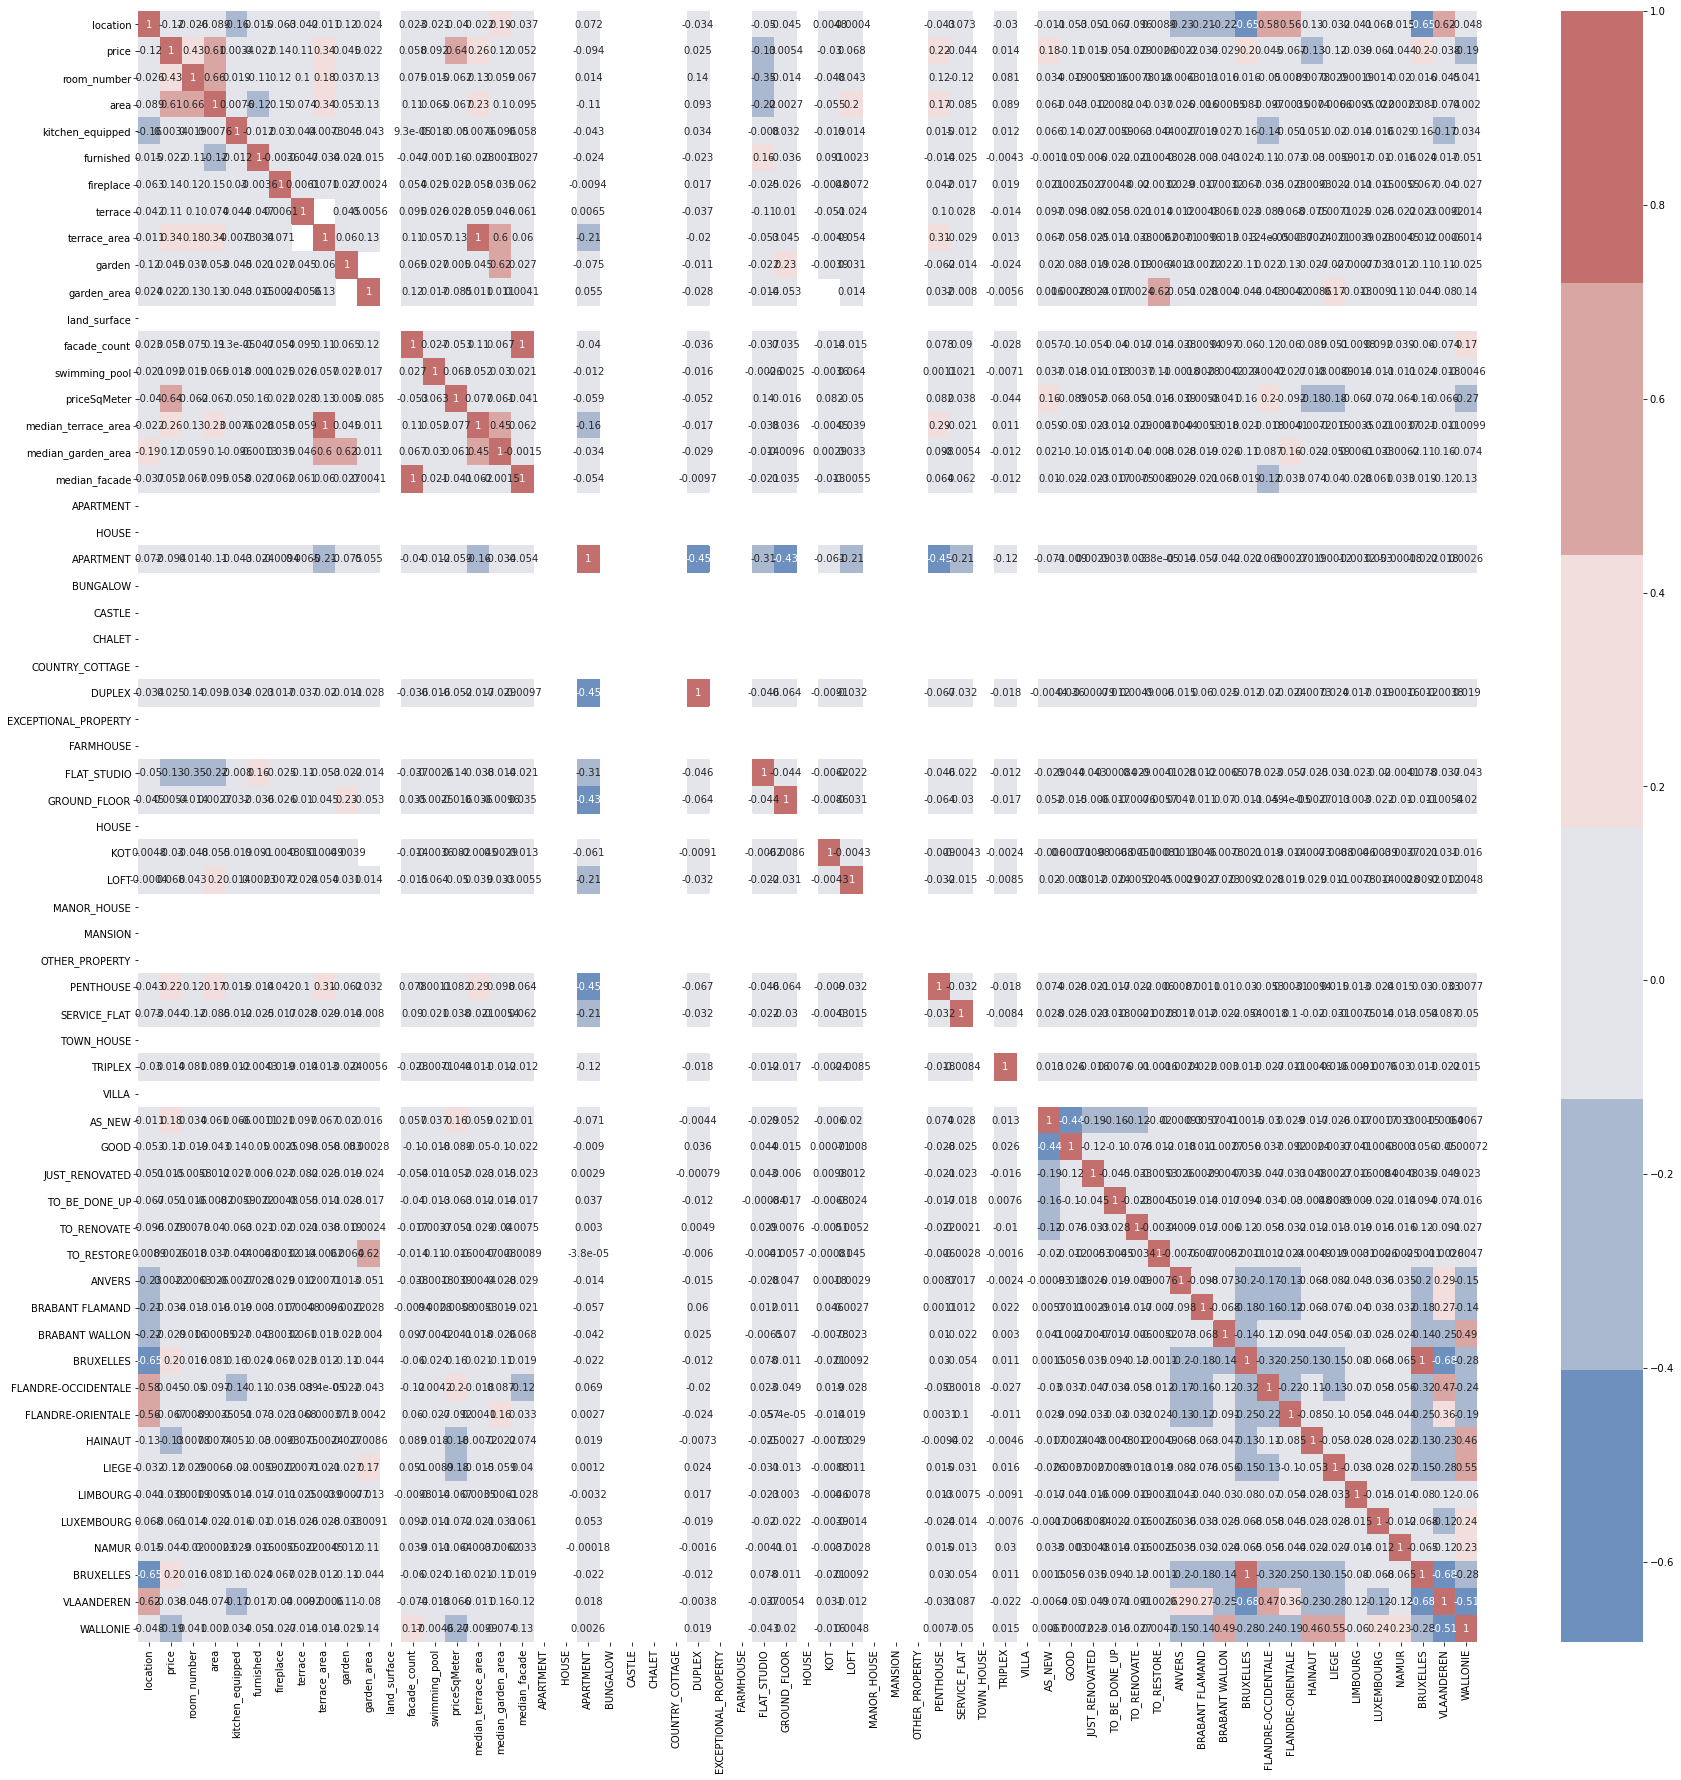

<Figure size 432x288 with 0 Axes>

In [44]:
fig,ax = plt.subplots(figsize=(30, 30)) 
plot=sns.heatmap(ds_apartment_n.corr(), cmap=sns.color_palette("vlag"), annot=True)
plt.show()
figure = plot.get_figure()
plt.savefig("heatmap.png", bbox_inches="tight")

In [45]:
#sns.pairplot(ds_house_n)

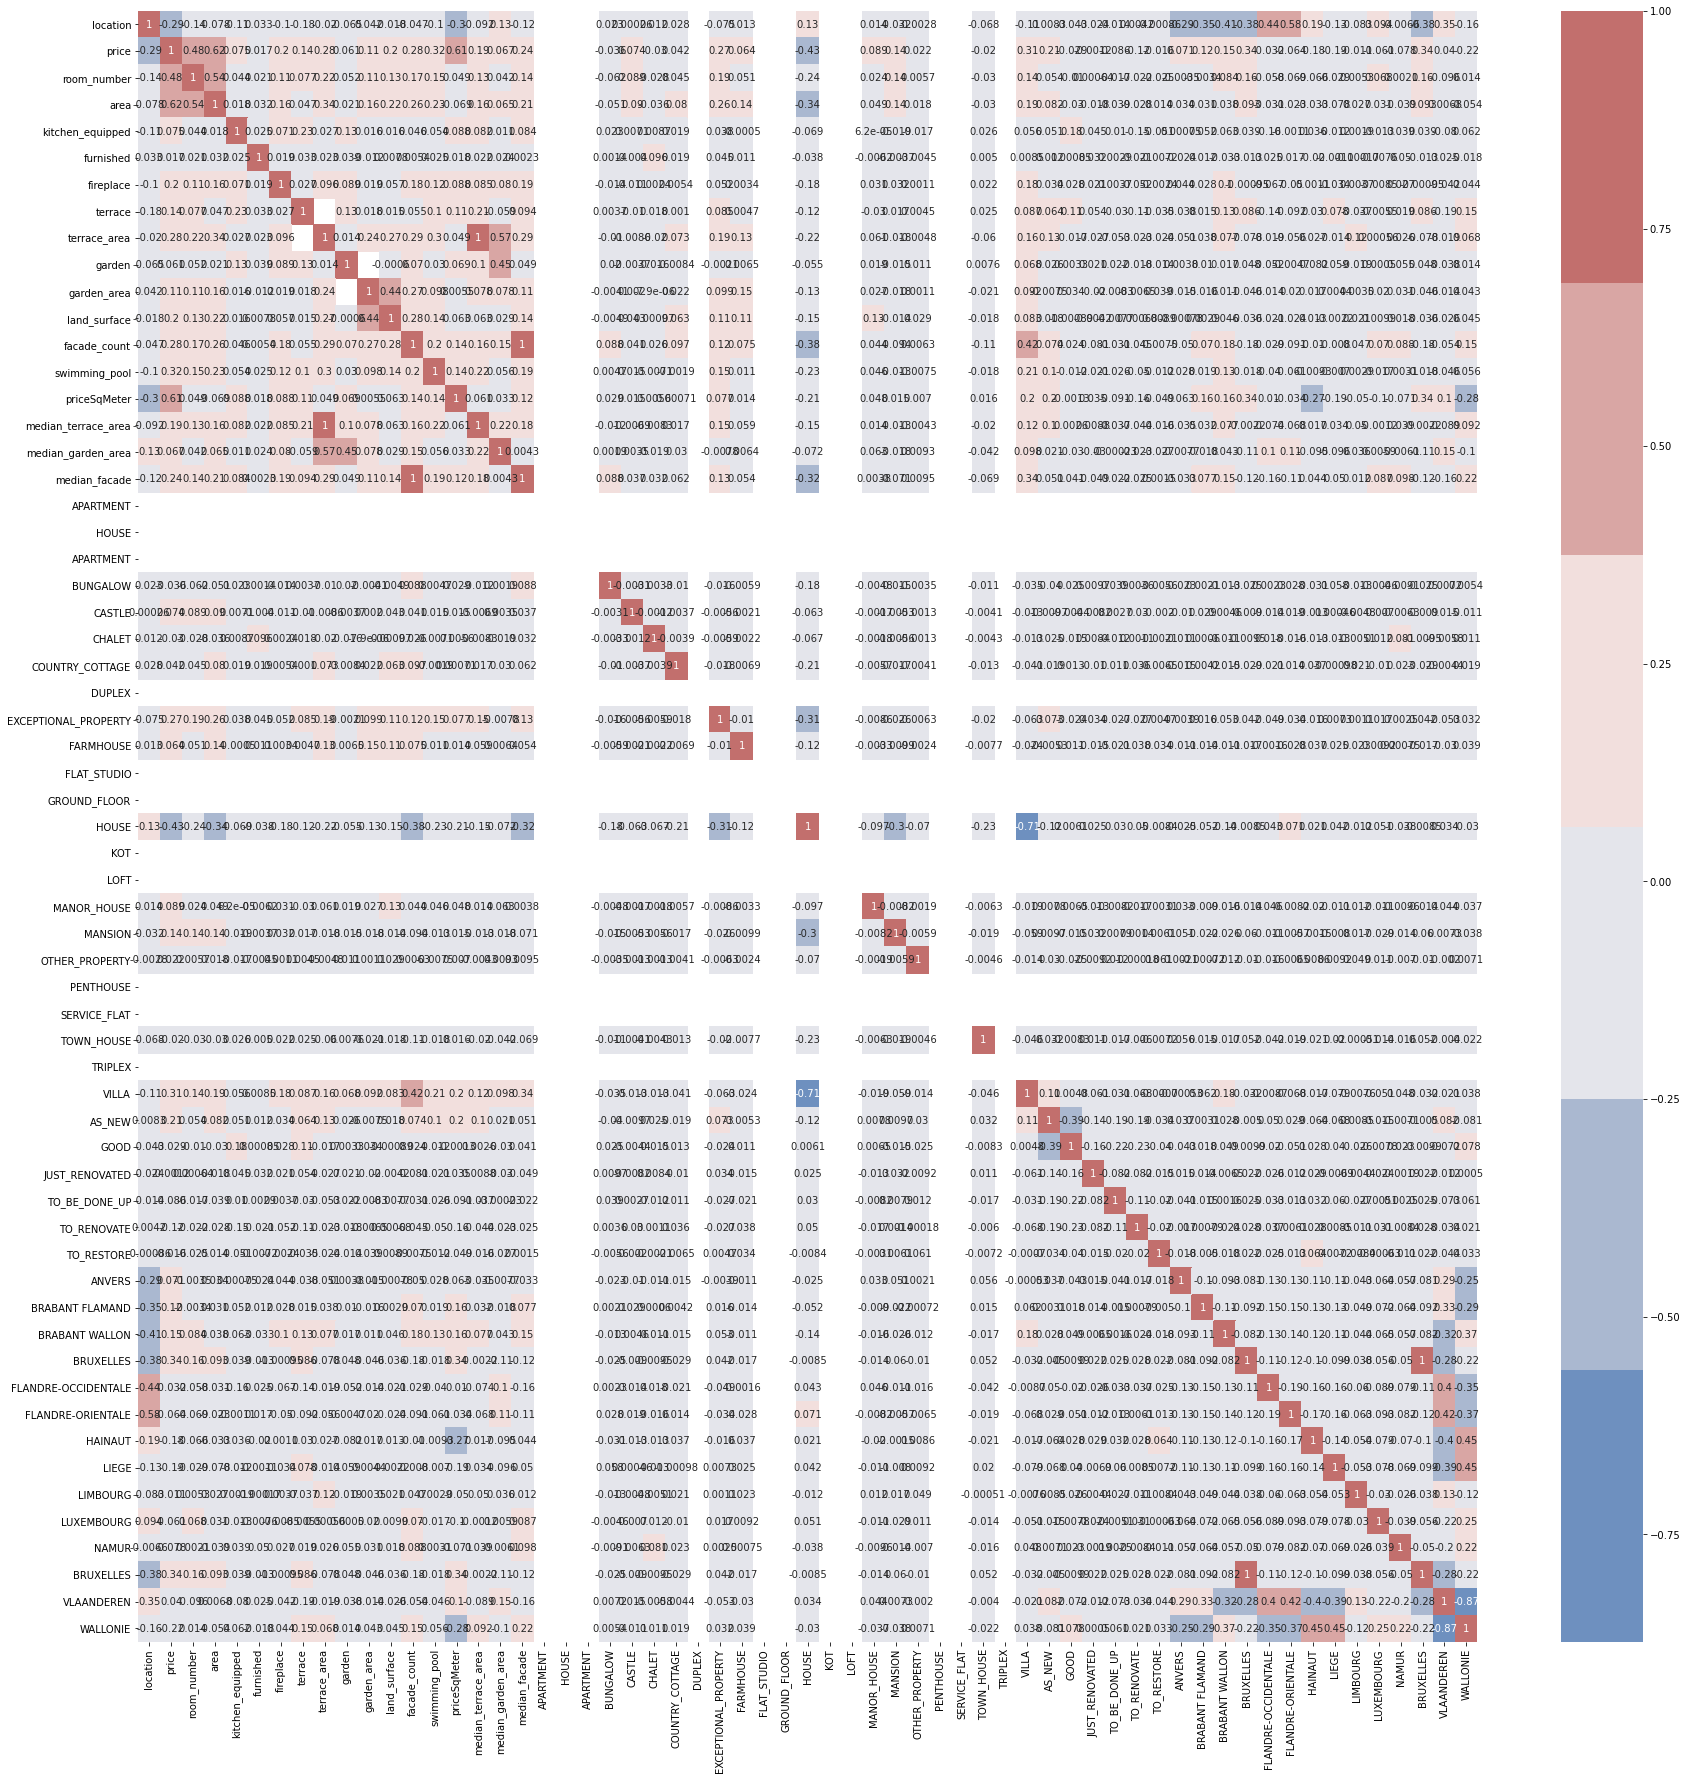

<Figure size 432x288 with 0 Axes>

In [46]:
fig,ax = plt.subplots(figsize=(30, 30)) 
plot=sns.heatmap(ds_house_n.corr(), cmap=sns.color_palette("vlag"), annot=True)
plt.show()
figure = plot.get_figure()
plt.savefig("heatmap.png", bbox_inches="tight")

C:\Users\atefe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

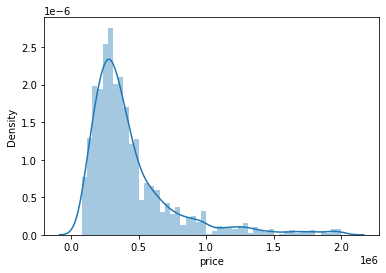

In [47]:
sns.distplot(ds_house_n['price'])

C:\Users\atefe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

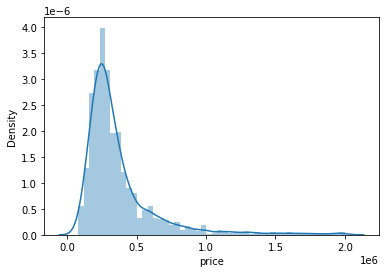

In [48]:
sns.distplot(ds_apartment_n['price'])

In [49]:
ds_apartment_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7409 entries, 14 to 15622
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7409 non-null   int64  
 1   price                 7409 non-null   float64
 2   room_number           7409 non-null   int64  
 3   area                  7409 non-null   float64
 4   kitchen_equipped      7409 non-null   int64  
 5   furnished             7409 non-null   int64  
 6   fireplace             7409 non-null   int64  
 7   terrace               7409 non-null   int64  
 8   terrace_area          4333 non-null   float64
 9   garden                7409 non-null   int64  
 10  garden_area           571 non-null    float64
 11  land_surface          0 non-null      float64
 12  facade_count          4312 non-null   float64
 13  swimming_pool         7409 non-null   int64  
 14  priceSqMeter          7409 non-null   float64
 15  median_terrace_area

In [89]:
ds_apartment_n.columns

Index(['location', 'price', 'room_number', 'area', 'kitchen_equipped',
       'furnished', 'fireplace', 'terrace', 'terrace_area', 'garden',
       'garden_area', 'land_surface', 'facade_count', 'swimming_pool',
       'priceSqMeter', 'median_terrace_area', 'median_garden_area',
       'median_facade', 'APARTMENT', 'HOUSE', 'APARTMENT', 'BUNGALOW',
       'CASTLE', 'CHALET', 'COUNTRY_COTTAGE', 'DUPLEX', 'EXCEPTIONAL_PROPERTY',
       'FARMHOUSE', 'FLAT_STUDIO', 'GROUND_FLOOR', 'HOUSE', 'KOT', 'LOFT',
       'MANOR_HOUSE', 'MANSION', 'OTHER_PROPERTY', 'PENTHOUSE', 'SERVICE_FLAT',
       'TOWN_HOUSE', 'TRIPLEX', 'VILLA', 'AS_NEW', 'GOOD', 'JUST_RENOVATED',
       'TO_BE_DONE_UP', 'TO_RENOVATE', 'TO_RESTORE', 'ANVERS',
       'BRABANT FLAMAND', 'BRABANT WALLON', 'BRUXELLES', 'FLANDRE-OCCIDENTALE',
       'FLANDRE-ORIENTALE', 'HAINAUT', 'LIEGE', 'LIMBOURG', 'LUXEMBOURG',
       'NAMUR', 'BRUXELLES', 'VLAANDEREN', 'WALLONIE'],
      dtype='object')

### X an y array

In [113]:
X_apartment = ds_apartment_n.drop(['location','price','garden_area','terrace_area','land_surface','facade_count','priceSqMeter'],axis=1)

y_apartment = ds_apartment['price']
X_house=ds_house_n.drop(['location','price','garden_area','terrace_area','facade_count','priceSqMeter'],axis=1)

y_house= ds_house['price']

In [114]:
X_apartment.head(5)

,room_number,area,kitchen_equipped,furnished,fireplace,terrace,garden,swimming_pool,median_terrace_area,median_garden_area,...,FLANDRE-OCCIDENTALE,FLANDRE-ORIENTALE,HAINAUT,LIEGE,LIMBOURG,LUXEMBOURG,NAMUR,BRUXELLES,VLAANDEREN,WALLONIE
14,1,69.0,1,0,0,0,1,0,16.0,16.0,...,0,1,0,0,0,0,0,0,1,0
20,2,93.0,1,0,0,1,0,0,12.0,12.0,...,0,0,0,0,0,0,0,0,0,1
22,2,106.0,1,0,0,1,0,0,32.0,32.0,...,0,1,0,0,0,0,0,0,1,0
23,1,60.0,0,0,0,0,0,0,16.0,16.0,...,0,1,0,0,0,0,0,0,1,0
24,1,80.0,1,0,0,0,0,0,16.0,16.0,...,0,0,0,0,0,0,0,0,1,0


In [115]:
X_apartment.shape

(7409, 54)

In [116]:
X_house.head(5)

,room_number,area,kitchen_equipped,furnished,fireplace,terrace,garden,land_surface,swimming_pool,median_terrace_area,...,FLANDRE-OCCIDENTALE,FLANDRE-ORIENTALE,HAINAUT,LIEGE,LIMBOURG,LUXEMBOURG,NAMUR,BRUXELLES,VLAANDEREN,WALLONIE
0,5,460.0,1,0,0,1,0,321.0,0,10.0,...,0,0,0,0,0,1,0,0,0,1
1,4,128.0,0,0,0,0,0,570.0,0,16.0,...,0,0,1,0,0,0,0,0,0,1
2,2,110.0,1,1,0,1,1,470.0,0,16.0,...,0,0,1,0,0,0,0,0,0,1
3,9,400.0,1,0,0,0,1,1500.0,0,16.0,...,0,0,0,1,0,0,0,0,0,1
4,5,452.0,0,0,0,0,1,460.0,0,16.0,...,0,1,0,0,0,0,0,0,1,0


In [117]:
X_house.shape

(7118, 55)

### Train test split

In [136]:
from sklearn.model_selection import train_test_split

X_apartment_train, X_apartment_test, y_apartment_train, y_apartment_test = train_test_split(X_apartment, y_apartment, test_size=0.2, random_state=42)
X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(X_house, y_house, test_size=0.2, random_state=42)

### Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression

reg_ap = LinearRegression(normalize=True)
reg_ap.fit(X_apartment_train,y_apartment_train)

reg_h = LinearRegression(normalize=True)
reg_h.fit(X_house_train,y_house_train)

LinearRegression(normalize=True)

In [138]:
y_pred_ap = reg_ap.predict(X_apartment_test)
y_pred_h = reg_h.predict(X_house_test)

In [139]:
#plt.scatter(y_test, y_pred)

In [140]:
#sns.distplot((y_test - y_pred), bins=50)

In [141]:
from sklearn.metrics import r2_score
score_ap=r2_score(y_apartment_test,y_pred_ap)
score_ap

0.37583858848076657

In [142]:
reg_ap.score(X_apartment_test, y_apartment_test)

0.37583858848076657

In [143]:
score_h=r2_score(y_house_test,y_pred_h)
score_h

0.5614695233022047

In [144]:
reg_h.score(X_house_test, y_house_test)

0.5614695233022047

In [85]:
X_apartment_train.shape

(5186, 55)

In [86]:
y_apartment_train.shape

(5186,)

In [105]:


X_apartment1 = ds_apartment[['area', 'kitchen_equipped', 'furnished','fireplace', 'terrace','garden','priceSqMeter']]
y_apartment = ds_apartment['price']

X_house1=ds_house[['area', 'kitchen_equipped', 'furnished','fireplace', 'terrace','garden','priceSqMeter']]
y_house= ds_house['price']

In [106]:
X_apartment_train1, X_apartment_test1, y_apartment_train1, y_apartment_test1 = train_test_split(X_apartment1, y_apartment, test_size=0.3, random_state=42)
X_house_train1, X_house_test1, y_house_train1, y_house_test1 = train_test_split(X_house1, y_house, test_size=0.3, random_state=42)

In [107]:
reg_ap1 = LinearRegression(normalize=True)
reg_ap1.fit(X_apartment_train1,y_apartment_train1)

reg_h1 = LinearRegression(normalize=True)
reg_h1.fit(X_house_train1,y_house_train1)

LinearRegression(normalize=True)

In [108]:
y_pred_ap1 = reg_ap1.predict(X_apartment_test1)
y_pred_h1 = reg_h1.predict(X_house_test1)

In [109]:
reg_ap1.score(X_apartment_test1, y_apartment_test1)

0.8418853993390021

In [110]:
reg_h1.score(X_house_test1, y_house_test1)

0.8519147866646831

In [139]:

X_apartment2 = ds_apartment[['area','room_number' ,'kitchen_equipped', 'furnished','fireplace', 'terrace','garden']]
y_apartment = ds_apartment['price']

X_house2=ds_house[['area','room_number', 'kitchen_equipped', 'furnished','fireplace', 'terrace','garden']]
y_house= ds_house['price']

In [140]:
X_apartment_train2, X_apartment_test2, y_apartment_train2, y_apartment_test2 = train_test_split(X_apartment2, y_apartment, test_size=0.3, random_state=42)
X_house_train2, X_house_test2, y_house_train2, y_house_test2 = train_test_split(X_house2, y_house, test_size=0.3, random_state=42)

In [141]:
reg_ap2 = LinearRegression(normalize=True)
reg_ap2.fit(X_apartment_train2,y_apartment_train2)

reg_h2 = LinearRegression(normalize=True)
reg_h2.fit(X_house_train2,y_house_train2)

LinearRegression(normalize=True)

In [142]:
y_pred_ap2 = reg_ap2.predict(X_apartment_test2)
y_pred_h2 = reg_h2.predict(X_house_test2)

In [143]:
reg_ap2.score(X_apartment_test2, y_apartment_test2)

0.33390950959772536

In [144]:
reg_h2.score(X_house_test2, y_house_test2)

0.45226180904104674

In [148]:
from sklearn.ensemble import GradientBoostingRegressor

In [149]:

estim_h = GradientBoostingRegressor(n_estimators=1000, max_depth=4, min_samples_split=2, learning_rate=0.1, loss='ls')
estim_a = GradientBoostingRegressor(n_estimators=1000, max_depth=4, min_samples_split=2, learning_rate=0.1, loss='ls')

In [150]:
estim_h.fit(X_house_train, y_house_train)

estim_a.fit(X_apartment_train, y_apartment_train)

GradientBoostingRegressor(max_depth=4, n_estimators=1000)

In [151]:
estim_h.score(X_house_train, y_house_train)


0.327254979628939

In [152]:
estim_a.score(X_apartment_train, y_apartment_train)

0.2476249724318551

In [153]:

y_pred_h = estim_h.predict(X_apartment_test)
y_pred_ap = estim_a.predict(X_house_test)

In [154]:
estim_h.score(X_house_test, y_house_test)

0.26058475804506387

In [155]:
estim_a.score(X_apartment_test, y_apartment_test)

0.20975132494525506